In [1]:
# Dependencies and Setup
import pandas as pd

# Load files
school_file = "Resources/schools_complete.csv"
student_file = "Resources/students_complete.csv"

# Read school data file and store into Pandas DataFrames
school_df = pd.read_csv(school_file)

# Read student data file and store into Pandas DataFrames
student_df = pd.read_csv(student_file)

## District Summary

In [2]:
# Calculation
school_count = school_df["School ID"].count()
student_count = student_df["Student ID"].count()
total_budget = school_df["budget"].sum()
avgscore_math = student_df["math_score"].mean()
avgscore_reading = student_df["reading_score"].mean()

# Calculate % of students passed math score >=70
pct_pass_math = student_df.loc[student_df["math_score"] >= 70,"Student ID"].count()/student_count*100

# Calculate % of students passed reading score >=70
pct_pass_reading = student_df.loc[student_df["reading_score"] >= 70,"Student ID"].count()/student_count*100

# Calculate % of students passed both match & reading
pct_pass_all = student_df.loc[(student_df["math_score"] >= 70) & (student_df["reading_score"] >= 70),"Student ID"].count()/student_count*100

In [3]:
# Creating summary DataFrame with all calculate data
district_summary_df = pd.DataFrame({"Total Schools": [school_count],
                                    "Total Students": [student_count],
                                    "Total Budget": [total_budget],
                                    "Average Math Score": [avgscore_math],
                                    "Average Reading Score": [avgscore_reading],
                                    "% Passing Math": [pct_pass_math],
                                    "% Passing Reading": [pct_pass_reading],
                                    "% Overall Passing": [pct_pass_all]
                                    })


In [4]:
# Formatting (Mapping)
district_summary_df["Total Schools"] = district_summary_df["Total Schools"].map("{:,}".format)
district_summary_df["Total Students"] = district_summary_df["Total Students"].map("{:,}".format)
district_summary_df["Total Budget"] = district_summary_df["Total Budget"].map("${:,.2f}".format)
district_summary_df["Average Math Score"] = district_summary_df["Average Math Score"].map("{:,.6f}".format)
district_summary_df["Average Reading Score"] = district_summary_df["Average Reading Score"].map("{:,.6f}".format)
district_summary_df["% Passing Math"] = district_summary_df["% Passing Math"].map("{:,.6f}".format)
district_summary_df["% Passing Reading"] = district_summary_df["% Passing Reading"].map("{:,.6f}".format)
district_summary_df["% Overall Passing"] = district_summary_df["% Overall Passing"].map("{:,.6f}".format)

district_summary_df

,Total Schools,Total Students,Total Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
0,15,"39,170","$24,649,428.00",78.985371,81.877840,74.980853,85.805463,65.172326


## School Summary

In [5]:
# Combine the two data files into a single DataFrame.  
combined_df = pd.merge(school_df, student_df, how="left", on=["school_name", "school_name"])

#Rename column
combined_df = combined_df.rename(columns={"school_name":"School Name"})


In [6]:
# Calculation with group by school name

school_grp_df = combined_df.groupby(["School Name"])

sc_type=school_grp_df["type"].min()
sc_student_count=school_grp_df["Student ID"].count()
sc_total_budget=school_grp_df["budget"].max()
sc_student_budget=sc_total_budget/sc_student_count
sc_avgscore_math=school_grp_df["math_score"].mean()
sc_avgscore_reading=school_grp_df["reading_score"].mean()

# % Passing math
sc_pct_pass_math = combined_df.loc[combined_df["math_score"]>=70].groupby('School Name')['Student ID'].count()/sc_student_count*100


# % Passing reading
sc_pct_pass_reading = combined_df.loc[combined_df["reading_score"]>=70].groupby('School Name')['Student ID'].count()/sc_student_count*100


# % Passing overall
sc_pct_pass_all = combined_df.loc[(combined_df["math_score"] >= 70) & (combined_df["reading_score"] >= 70)].groupby('School Name')['Student ID'].count()/sc_student_count*100



In [7]:
# Creating summary DataFrame with all calculate data
school_summary_df = pd.DataFrame({"School Type": sc_type,
                                    "Total Students": sc_student_count.map("{:,}".format),
                                    "Total School Budget": sc_total_budget.map("${:,.2f}".format),
                                    "Per Student Budget": sc_student_budget.map("${:,.2f}".format),
                                    "Average Math Score": sc_avgscore_math.map("{:,.6f}".format),
                                    "Average Reading Score": sc_avgscore_reading.map("{:,.6f}".format),
                                    "% Passing Math": sc_pct_pass_math.map("{:,.6f}".format),
                                    "% Passing Reading": sc_pct_pass_reading.map("{:,.6f}".format),
                                    "% Overall Passing": sc_pct_pass_all.map("{:,.6f}".format)
                                    })
school_summary_df

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
School Name,,,,,,,,,
Bailey High School,District,"4,976","$3,124,928.00",$628.00,77.048432,81.033963,66.680064,81.933280,54.642283
Cabrera High School,Charter,"1,858","$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769
Figueroa High School,District,"2,949","$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476
Ford High School,District,"2,739","$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,54.289887
Griffin High School,Charter,"1,468","$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455
Hernandez High School,District,"4,635","$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508
Holden High School,Charter,427,"$248,087.00",$581.00,83.803279,83.814988,92.505855,96.252927,89.227166
Huang High School,District,"2,917","$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884
Johnson High School,District,"4,761","$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172


## Top Performing Schools (By % Overall Passing)

In [8]:
# Top five performing schools by % overall passing

top5_df = school_summary_df.sort_values(["% Overall Passing"], ascending=False)

top5_df.head(5)

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
School Name,,,,,,,,,
Cabrera High School,Charter,"1,858","$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769
Thomas High School,Charter,"1,635","$1,043,130.00",$638.00,83.418349,83.848930,93.272171,97.308869,90.948012
Griffin High School,Charter,"1,468","$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455
Wilson High School,Charter,"2,283","$1,319,574.00",$578.00,83.274201,83.989488,93.867718,96.539641,90.582567
Pena High School,Charter,962,"$585,858.00",$609.00,83.839917,84.044699,94.594595,95.945946,90.540541


## Bottom Performing Schools (By % Overall Passing)

In [9]:
#Five worst-performing schools by % overall passing

worst5_df = school_summary_df.sort_values(["% Overall Passing"], ascending=True)

worst5_df.head(5)

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
School Name,,,,,,,,,
Rodriguez High School,District,"3,999","$2,547,363.00",$637.00,76.842711,80.744686,66.366592,80.220055,52.988247
Figueroa High School,District,"2,949","$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476
Huang High School,District,"2,917","$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884
Hernandez High School,District,"4,635","$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508
Johnson High School,District,"4,761","$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172


## Math Scores by Grade

In [10]:
# Calculation with group by school name

school_math_df = combined_df.groupby(["School Name"])

# Average math score per grade
nine_grade = combined_df.loc[combined_df["grade"]=="9th"].groupby('School Name')['math_score'].mean()
ten_grade = combined_df.loc[combined_df["grade"]=="10th"].groupby('School Name')['math_score'].mean()
eleven_grade = combined_df.loc[combined_df["grade"]=="11th"].groupby('School Name')['math_score'].mean()
twelve_grade = combined_df.loc[combined_df["grade"]=="12th"].groupby('School Name')['math_score'].mean()


In [11]:
# Creating summary DataFrame with all calculate data
math_grade_df = pd.DataFrame({"9th": nine_grade,
                               "10th": nine_grade,
                               "11th": eleven_grade,
                               "12th": twelve_grade
                             })
math_grade_df

,9th,10th,11th,12th
School Name,,,,
Bailey High School,77.083676,77.083676,77.515588,76.492218
Cabrera High School,83.094697,83.094697,82.765560,83.277487
Figueroa High School,76.403037,76.403037,76.884344,77.151369
Ford High School,77.361345,77.361345,76.918058,76.179963
Griffin High School,82.044010,82.044010,83.842105,83.356164
Hernandez High School,77.438495,77.438495,77.136029,77.186567
Holden High School,83.787402,83.787402,85.000000,82.855422
Huang High School,77.027251,77.027251,76.446602,77.225641
Johnson High School,77.187857,77.187857,77.491653,76.863248


## Reading Score by Grade 

In [12]:
# Calculation with group by school name

school_math_df = combined_df.groupby(["School Name"])

# Average math score per grade
rnine_grade = combined_df.loc[combined_df["grade"]=="9th"].groupby('School Name')['reading_score'].mean()
rten_grade = combined_df.loc[combined_df["grade"]=="10th"].groupby('School Name')['reading_score'].mean()
releven_grade = combined_df.loc[combined_df["grade"]=="11th"].groupby('School Name')['reading_score'].mean()
rtwelve_grade = combined_df.loc[combined_df["grade"]=="12th"].groupby('School Name')['reading_score'].mean()

In [13]:
# Creating summary DataFrame with all calculate data
reading_grade_df = pd.DataFrame({"9th": rnine_grade,
                               "10th": rnine_grade,
                               "11th": releven_grade,
                               "12th": rtwelve_grade
                             })
reading_grade_df

,9th,10th,11th,12th
School Name,,,,
Bailey High School,81.303155,81.303155,80.945643,80.912451
Cabrera High School,83.676136,83.676136,83.788382,84.287958
Figueroa High School,81.198598,81.198598,80.640339,81.384863
Ford High School,80.632653,80.632653,80.403642,80.662338
Griffin High School,83.369193,83.369193,84.288089,84.013699
Hernandez High School,80.866860,80.866860,81.396140,80.857143
Holden High School,83.677165,83.677165,83.815534,84.698795
Huang High School,81.290284,81.290284,81.417476,80.305983
Johnson High School,81.260714,81.260714,80.616027,81.227564


## Scores by School Spending

In [14]:
# Creating student budget DataFrame using school_grp_df

student_budget_df = pd.DataFrame({"Per Student Budget": sc_student_budget,
                                    "Average Math Score": sc_avgscore_math,
                                    "Average Reading Score": sc_avgscore_reading,
                                    "% Passing Math": sc_pct_pass_math,
                                    "% Passing Reading": sc_pct_pass_reading,
                                    "% Overall Passing": sc_pct_pass_all
                                    })

In [15]:
# Create bins in which value will be stored
bins = [0,584,629,644,675]

#Create label for each bin
budget_range = ["<$584","$585-629","$630-644","$645-675"]

#Insert new column 'Spending Ranges Per Student'
student_budget_df["Spending Ranges Per Student"]=pd.cut(student_budget_df["Per Student Budget"]
                                                    ,bins,labels=budget_range, include_lowest=True)

In [16]:
# Calculation with group by Student Budget Category

spend_perform_df = student_budget_df.groupby(["Spending Ranges Per Student"])

sp_avgscore_math=spend_perform_df["Average Math Score"].mean()
sp_avgscore_reading=spend_perform_df["Average Reading Score"].mean()
sp_pass_math=spend_perform_df["% Passing Math"].mean()
sp_pass_read=spend_perform_df["% Passing Reading"].mean()
sp_pass_all=spend_perform_df["% Overall Passing"].mean()


In [17]:
# Creating summary DataFrame with all calculate data
spend_perform_df = pd.DataFrame({"Average Math Score": sp_avgscore_math.map("{:,.2f}".format),
                                    "Average Reading Score": sp_avgscore_reading.map("{:,.2f}".format),
                                    "% Passing Math": sp_pass_math.map("{:,.2f}".format),
                                    "% Passing Reading": sp_pass_read.map("{:,.2f}".format),
                                    "% Overall Passing": sp_pass_all.map("{:,.2f}".format)
                                    })
spend_perform_df

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Spending Ranges Per Student,,,,,
<$584,83.46,83.93,93.46,96.61,90.37
$585-629,81.90,83.16,87.13,92.72,81.42
$630-644,78.52,81.62,73.48,84.39,62.86
$645-675,77.00,81.03,66.16,81.13,53.53


## Scores by School  Size

In [18]:
# Creating school size DataFrame using school_grp_df

school_size_df = pd.DataFrame({"school_size": sc_student_count,
                                    "Average Math Score": sc_avgscore_math,
                                    "Average Reading Score": sc_avgscore_reading,
                                    "% Passing Math": sc_pct_pass_math,
                                    "% Passing Reading": sc_pct_pass_reading,
                                    "% Overall Passing": sc_pct_pass_all
                                    })

In [19]:
# Create bins in which value will be stored
bins = [0,1000,2000,5000]

#Create label for each bin
size_range = ["Small ""(<1000)","Medium ""(1000-2000)","Large ""(2000-5000)"]

#Insert new column 'Spending Ranges Per Student'
school_size_df["School Size"]=pd.cut(school_size_df["school_size"]
                                                    ,bins,labels=size_range, include_lowest=True)


In [20]:
# Calculation with group by School Size

size_perform_df = school_size_df.groupby(["School Size"])

cp_avgscore_math=size_perform_df["Average Math Score"].mean()
cp_avgscore_reading=size_perform_df["Average Reading Score"].mean()
cp_pass_math=size_perform_df["% Passing Math"].mean()
cp_pass_read=size_perform_df["% Passing Reading"].mean()
cp_pass_all=size_perform_df["% Overall Passing"].mean()

In [21]:
# Creating summary DataFrame with all calculate data
size_perform_df = pd.DataFrame({"Average Math Score": cp_avgscore_math.map("{:,.2f}".format),
                                    "Average Reading Score": cp_avgscore_reading.map("{:,.2f}".format),
                                    "% Passing Math": cp_pass_math.map("{:,.2f}".format),
                                    "% Passing Reading": cp_pass_read.map("{:,.2f}".format),
                                    "% Overall Passing": cp_pass_all.map("{:,.2f}".format)
                                    })
size_perform_df

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
School Size,,,,,
Small (<1000),83.82,83.93,93.55,96.10,89.88
Medium (1000-2000),83.37,83.86,93.60,96.79,90.62
Large (2000-5000),77.75,81.34,69.96,82.77,58.29


## Scores by School Type

In [22]:
# Creating school type DataFrame using school_grp_df

school_type_df = pd.DataFrame({"School Type": sc_type,
                                    "Average Math Score": sc_avgscore_math,
                                    "Average Reading Score": sc_avgscore_reading,
                                    "% Passing Math": sc_pct_pass_math,
                                    "% Passing Reading": sc_pct_pass_reading,
                                    "% Overall Passing": sc_pct_pass_all
                                    })

In [23]:
# Calculation with group by School Size

type_perform_df = school_type_df.groupby(["School Type"])

st_avgscore_math=type_perform_df["Average Math Score"].mean()
st_avgscore_reading=type_perform_df["Average Reading Score"].mean()
st_pass_math=type_perform_df["% Passing Math"].mean()
st_pass_read=type_perform_df["% Passing Reading"].mean()
st_pass_all=type_perform_df["% Overall Passing"].mean()


In [24]:
# Creating DataFrame with all calculate data
type_perform_df = pd.DataFrame({"Average Math Score": st_avgscore_math.map("{:,.2f}".format),
                                    "Average Reading Score": st_avgscore_reading.map("{:,.2f}".format),
                                    "% Passing Math": st_pass_math.map("{:,.2f}".format),
                                    "% Passing Reading": st_pass_read.map("{:,.2f}".format),
                                    "% Overall Passing": st_pass_all.map("{:,.2f}".format)
                                    })
type_perform_df

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
School Type,,,,,
Charter,83.47,83.90,93.62,96.59,90.43
District,76.96,80.97,66.55,80.80,53.67


# ANALYSIS CONCLUSION

### Conclusion 1 
Students at Charter schools perform overall better than students at District schools. Results demonstrated in the below 3 summary tables: 


Performance by School Type
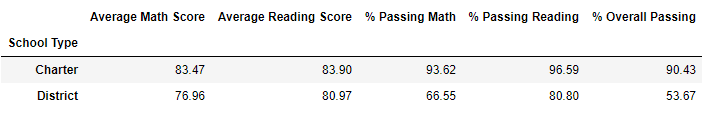

Top 5 Best Performance Schools
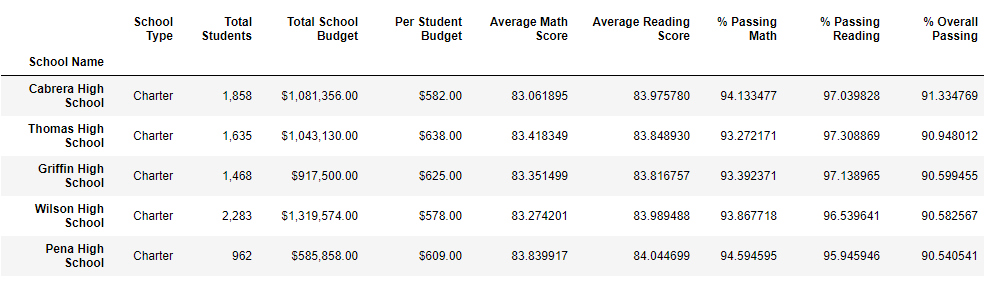

Worst 5 Performance Schools
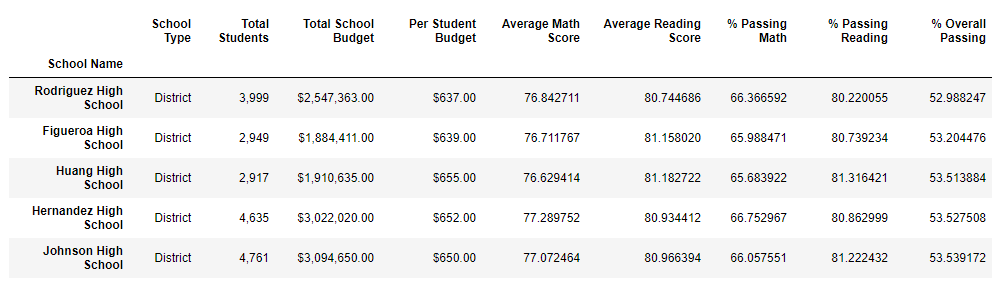

### Conclusion 2
Schools with lower spending range and small/medium student size perform overall better as illustrated in the below two analysis: 

Performace by Budget Spending on per Student
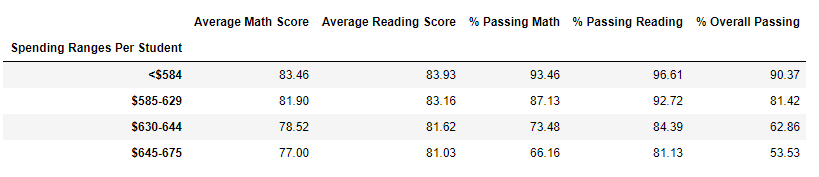

Performance by Student Size
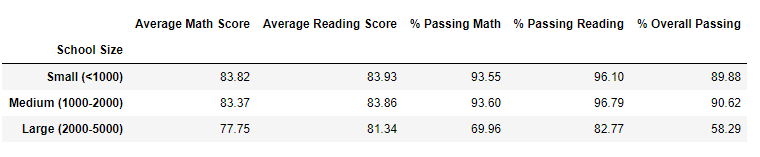

Furthermore, the below analysis indicates that schools with small to medium student size generally correlated to lower spending budget on per student.

In [25]:
# Merging student spending range with size range of school
merge_df=pd.merge(student_budget_df,school_size_df, how="inner", on = ["School Name"], suffixes=(""," "))

spend_size_df=merge_df.loc[:,["Spending Ranges Per Student","School Size","% Overall Passing"]]

# Sorted Dataframe
sorted_df=spend_size_df.sort_values(["Spending Ranges Per Student","School Size"], ascending=True)

sorted_df

,Spending Ranges Per Student,School Size,% Overall Passing
School Name,,,
Holden High School,<$584,Small (<1000),89.227166
Cabrera High School,<$584,Medium (1000-2000),91.334769
Wright High School,<$584,Medium (1000-2000),90.333333
Wilson High School,<$584,Large (2000-5000),90.582567
Pena High School,$585-629,Small (<1000),90.540541
Griffin High School,$585-629,Medium (1000-2000),90.599455
Shelton High School,$585-629,Medium (1000-2000),89.892107
Bailey High School,$585-629,Large (2000-5000),54.642283
Thomas High School,$630-644,Medium (1000-2000),90.948012
